In [23]:
include("../Source/types.jl")
include("../Source/functions.jl")

testSystem (generic function with 2 methods)

In [2]:

# We run a simulation with the parameters
g = 0.3    # Gauge coupling
ν = 0.3    # Anisotropy
H = -0.72   # External field

# Other parameters
L = 100     # System length
T = 0.5   # Temperature
γ = 1.0    # Order parameter amplitud

# MC parameters
M = 1000    # Number of measurements
Δt = 400  # Interval between measurements (MCS)

# Calculate periodic boundary conditioned f s.t. fL ∈ N
f = ceil(abs(H/(2π)*L))/L*sign(H)
# Calculate inverse temperature
β = 1/T

# Create system
syst = SystConstants(L, γ, 1/g^2, ν, f, β)
sim = Controls(π/3, 0.4, 3.0)

Controls(1.0471975511965976, 0.4, 3.0)

In [3]:
f

-0.12

Finding Equilibrium of
SystConstants(100, 1.0, 11.11111111111111, 0.3, -0.12, 2.0)
Controls(1.0471975511965976, 0.4, 3.0)
Searching for ΔE <= 0..
ΔE <= 0 found at t₀ = 27668!
Checking if average is close to 0..
Equilibrium found at time 48133
over the interval [27668, 38453]
s.t. <ΔE> = 108.58 ± 1.2
std(ΔE) = 121.1


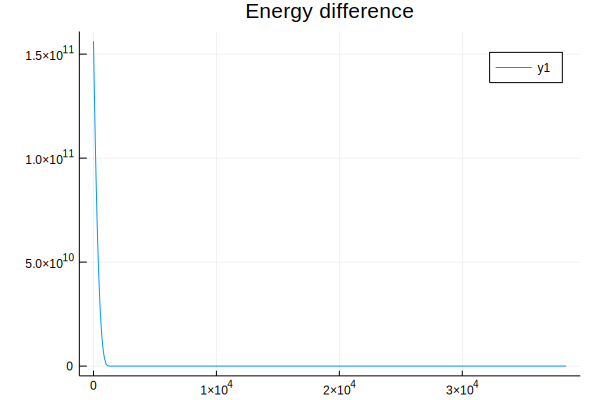

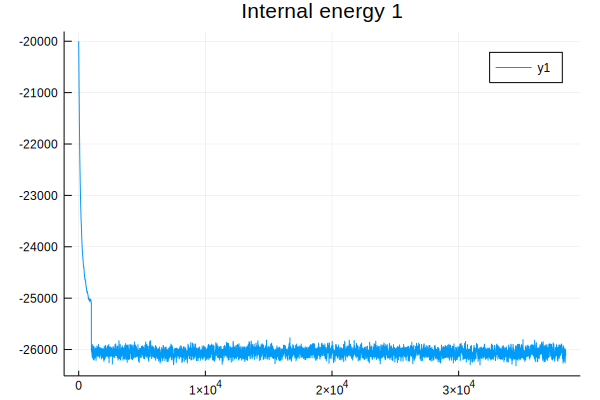

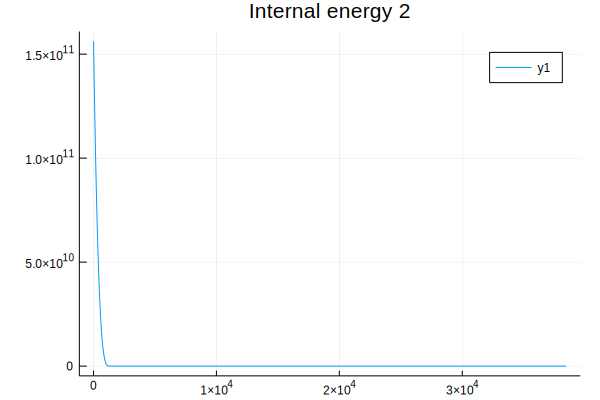

Performing extra MCS


Excessive output truncated after 524295 bytes.

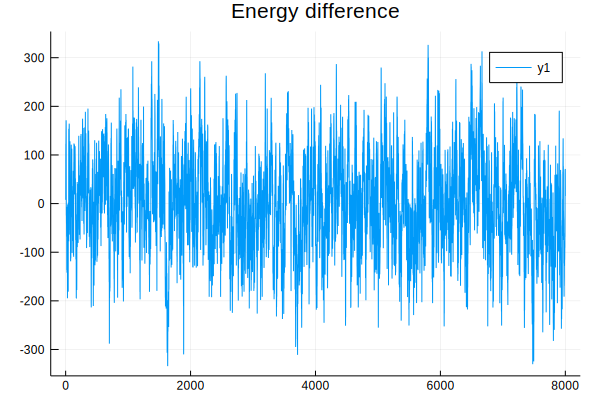

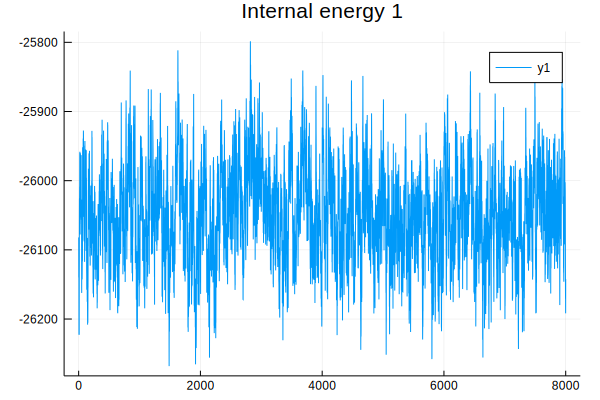

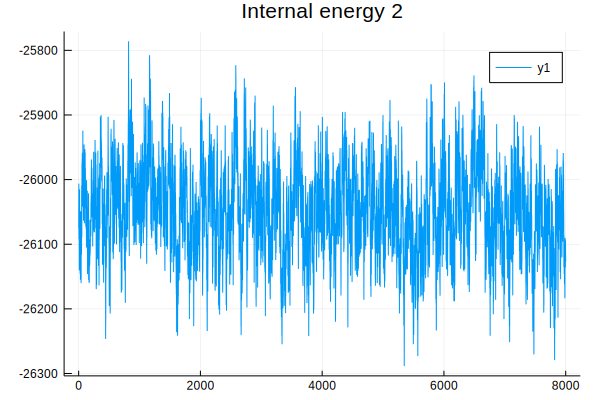

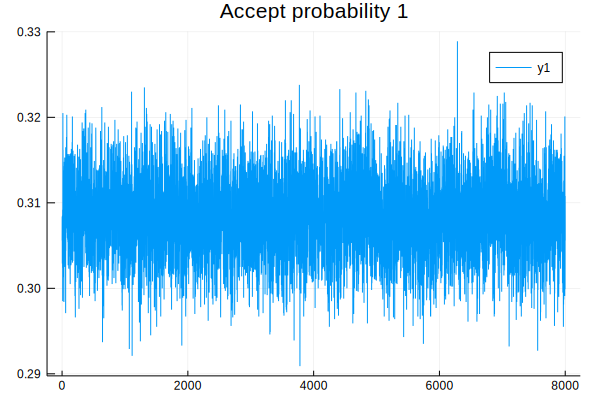

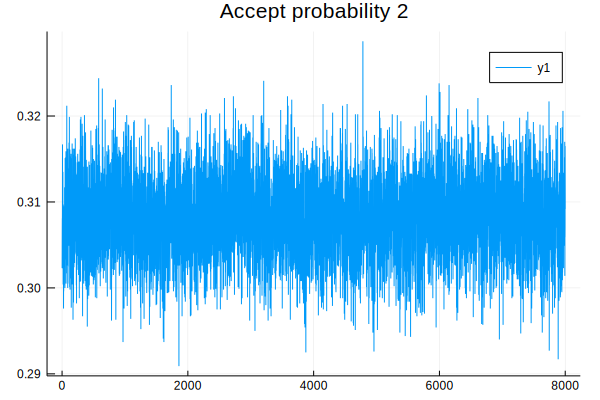

In [4]:
(ψ₁, sim₁, ψ₂, sim₂) = initializeTwoStates(syst, sim);

In [5]:
M = 1000
Δt = 1000
ψ = copy(ψ₁)
sim = copy(sim₁)

Controls(0.6981317007977318, 0.4, 0.11705532693187014)

In [6]:
# Construct k-matrix where the horizontal axis contains kx ∈ [-π, π), while
# the vertical axis contain ky ∈ [-π, π) at the second component
k_matrix = [[2π/L*(x-1-L/2), 2π/L*(L/2-y)] for y=1:L, x=1:L]

# Calculate thermal average
(avV⁺, errV⁺, V⁺, avV⁻, errV⁻, V⁻, avS⁺, errS⁺, S⁺, avS⁻, errS⁻, S⁻) = structureFunctionVortexLatticeAvg!(k_matrix, ψ, sim, M, Δt);


Making measurements over a 100×100 matrix of ks.


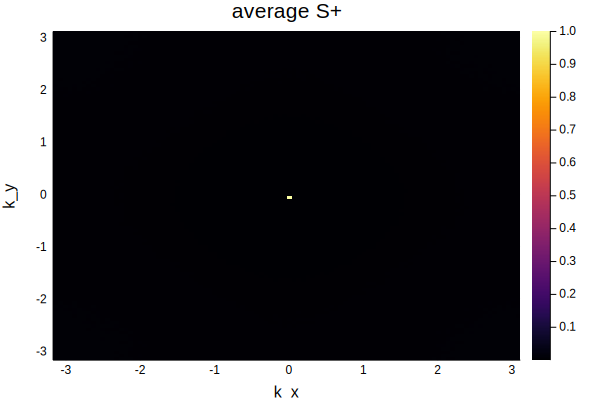

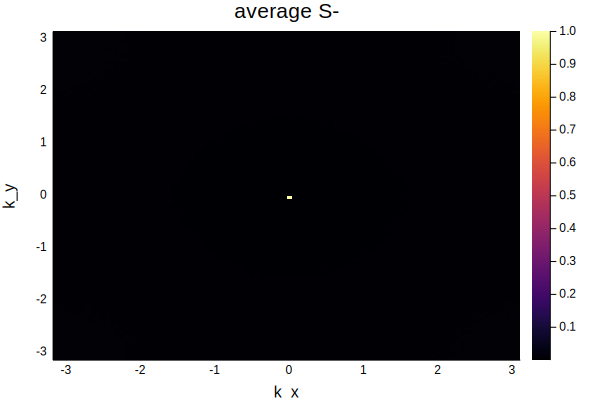

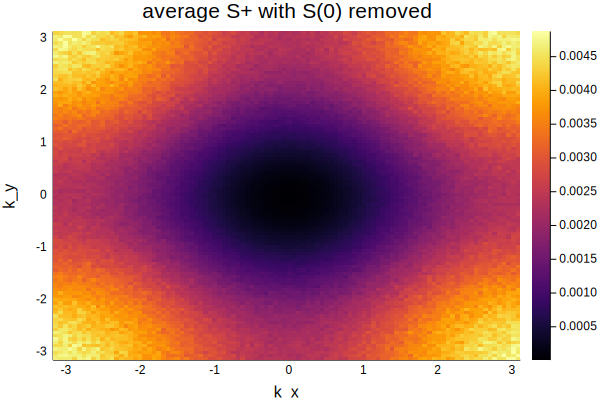

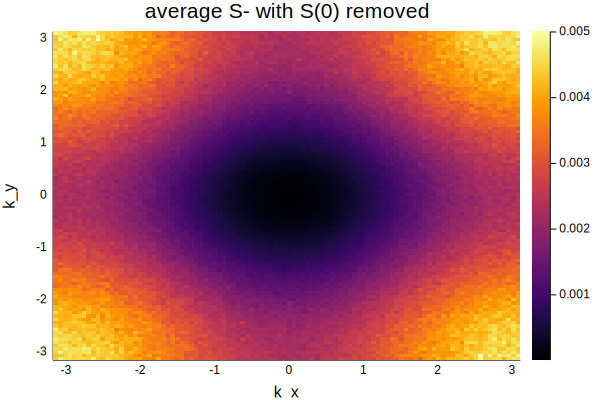

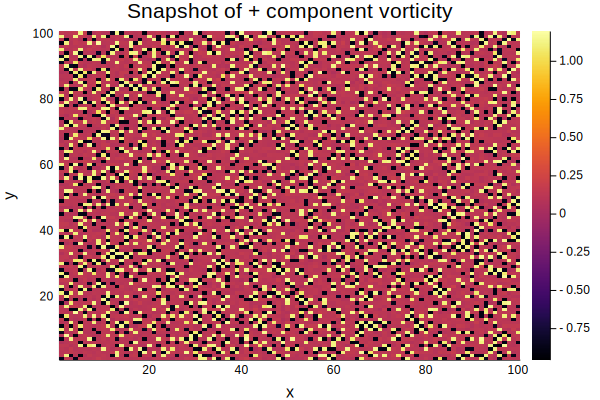

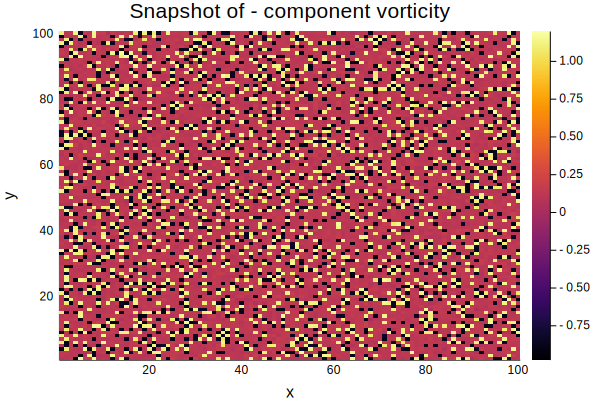

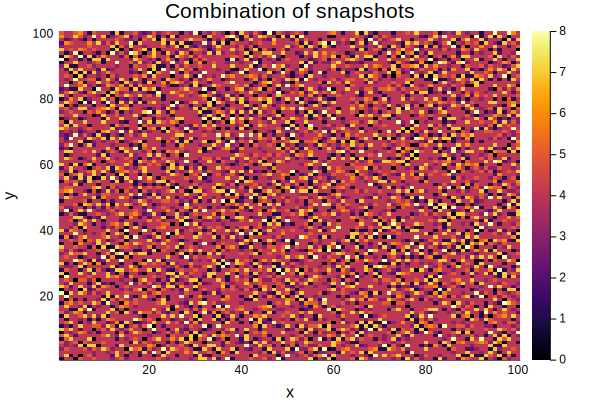

S⁺(0) ≈ 1.0000000000000002
S⁻(0) ≈ 1.0000000000000002
The proportion of vortices (n⁺, n⁻) in snapshot
% of vortex kind (-1, -1): 	3
% of vortex kind (-1, 0): 	11
% of vortex kind (-1, 1): 	3
% of vortex kind (0, -1): 	11
% of vortex kind (0, 0): 	45
% of vortex kind (0, 1): 	11
% of vortex kind (1, -1): 	3
% of vortex kind (1, 0): 	12
% of vortex kind (1, 1): 	3

Sum of + component vorticity in the snapshot: 1199.9999999999961
Sum of - component vorticity in the snapshot: 1199.9999999999993


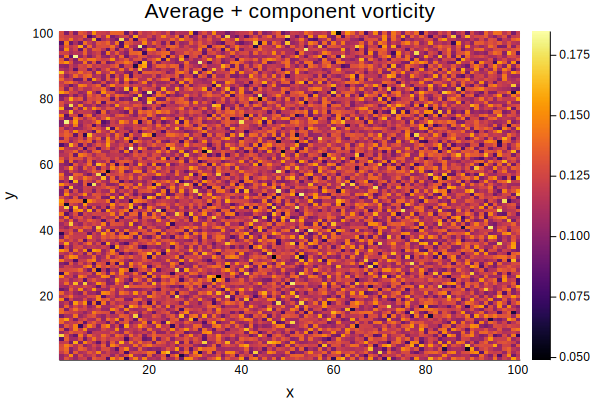

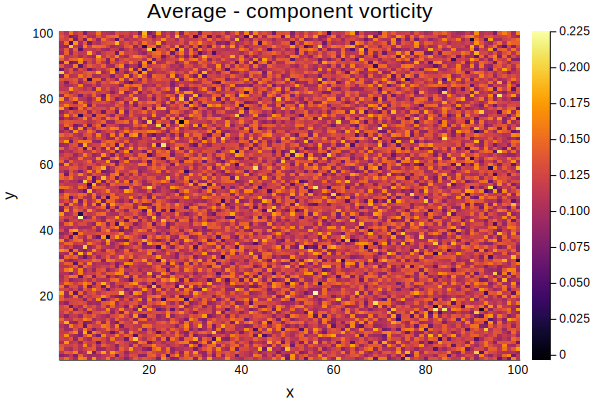

In [24]:
plotStructureFunctionAndVortexLattice(avV⁺, avV⁻, V⁺[rand(1:M)], V⁻[rand(1:M)], avS⁺, avS⁻)

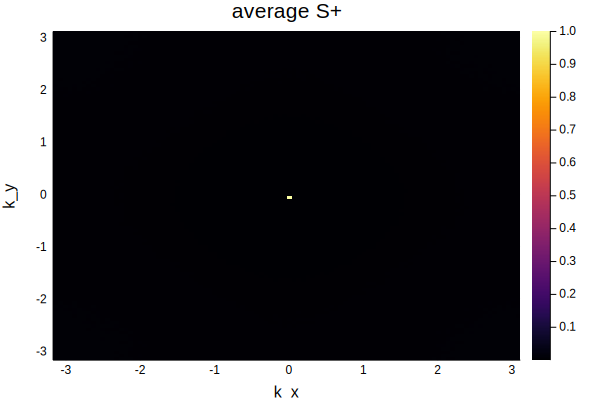

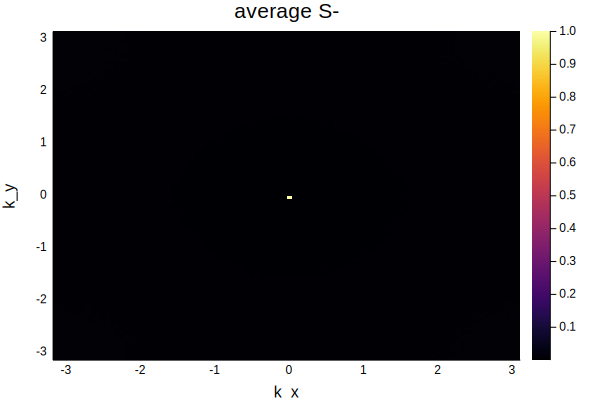

In [22]:
L = size(avV⁺,1)
# Plotting structure factor
k_int = -π:2π/L:π*(L-1)/L
plt = heatmap(k_int, k_int, avS⁺, title="average S+", xlabel="k_x", ylabel="k_y")
display(plt)
plt = heatmap(k_int, k_int, avS⁻, title="average S-", xlabel="k_x", ylabel="k_y")
display(plt)

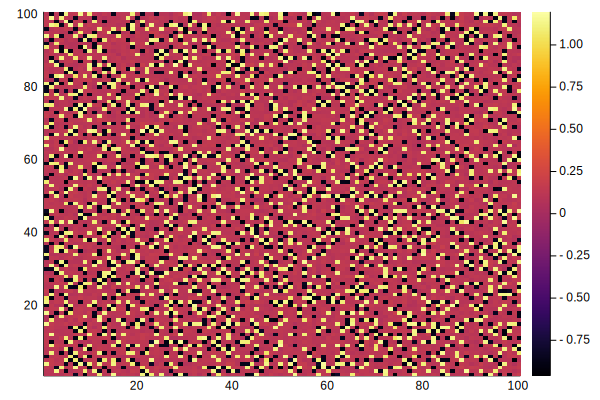

In [9]:
heatmap(1:L, 1:L, v_matrix⁺)